In [4]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()

In [6]:
newphonedata = pd.read_csv('newphonedata.csv')
newphonedata

,Unnamed: 0,BatteryPower,InternalMemory,ClockSpeed,NoOfCores,RAM,TalkTime,DualSim,3G,4G,...,Bluetooth,MobileDepth,MobileWeight,TouchScreen,ScreenHeight,ScreenWidth,FrontCameraPx,RearCameraPX,PriceRange,Total Resolution
0,0,842,7,2.2,2,2549,19,0,0,0,...,0,0.6,188,0,9,7,1,2,1,15120
1,1,1021,53,0.5,3,2631,7,1,1,1,...,1,0.7,136,1,17,3,0,6,2,1799140
2,2,563,41,0.5,5,2603,9,1,1,1,...,1,0.9,145,1,11,2,2,6,2,2167308
3,3,615,10,2.5,6,2769,11,0,1,0,...,1,0.8,131,0,16,8,0,9,2,2171776
4,4,1821,44,1.2,2,1411,15,0,1,1,...,1,0.6,141,1,8,2,13,14,1,1464096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,794,2,0.5,6,668,19,1,1,1,...,1,0.8,106,1,13,4,0,14,0,2309580
1996,1996,1965,39,2.6,4,2032,16,1,1,0,...,1,0.2,187,1,11,10,0,3,2,1797975
1997,1997,1911,36,0.9,8,3057,5,1,1,1,...,0,0.7,108,1,9,1,1,3,3,1416576
1998,1998,1512,46,0.9,5,869,19,0,1,1,...,0,0.1,145,1,18,10,4,5,0,225120


# Model 1: Decision Tree

[Text(0.5, 0.9, 'RAM <= 2246.0\ngini = 0.75\nsamples = 1400\nvalue = [361, 351, 357, 331]\nclass = 0'),
 Text(0.25, 0.7, 'RAM <= 1173.5\ngini = 0.589\nsamples = 757\nvalue = [361, 314, 82, 0]\nclass = 0'),
 Text(0.125, 0.5, 'Total Resolution <= 2018676.5\ngini = 0.218\nsamples = 338\nvalue = [296, 42, 0, 0]\nclass = 0'),
 Text(0.0625, 0.3, 'BatteryPower <= 1838.0\ngini = 0.119\nsamples = 299\nvalue = [280, 19, 0, 0]\nclass = 0'),
 Text(0.03125, 0.1, 'gini = 0.059\nsamples = 265\nvalue = [257, 8, 0, 0]\nclass = 0'),
 Text(0.09375, 0.1, 'gini = 0.438\nsamples = 34\nvalue = [23, 11, 0, 0]\nclass = 0'),
 Text(0.1875, 0.3, 'RAM <= 691.0\ngini = 0.484\nsamples = 39\nvalue = [16, 23, 0, 0]\nclass = 1'),
 Text(0.15625, 0.1, 'gini = 0.397\nsamples = 22\nvalue = [16, 6, 0, 0]\nclass = 0'),
 Text(0.21875, 0.1, 'gini = 0.0\nsamples = 17\nvalue = [0, 17, 0, 0]\nclass = 1'),
 Text(0.375, 0.5, 'BatteryPower <= 1463.0\ngini = 0.516\nsamples = 419\nvalue = [65, 272, 82, 0]\nclass = 1'),
 Text(0.3125, 0

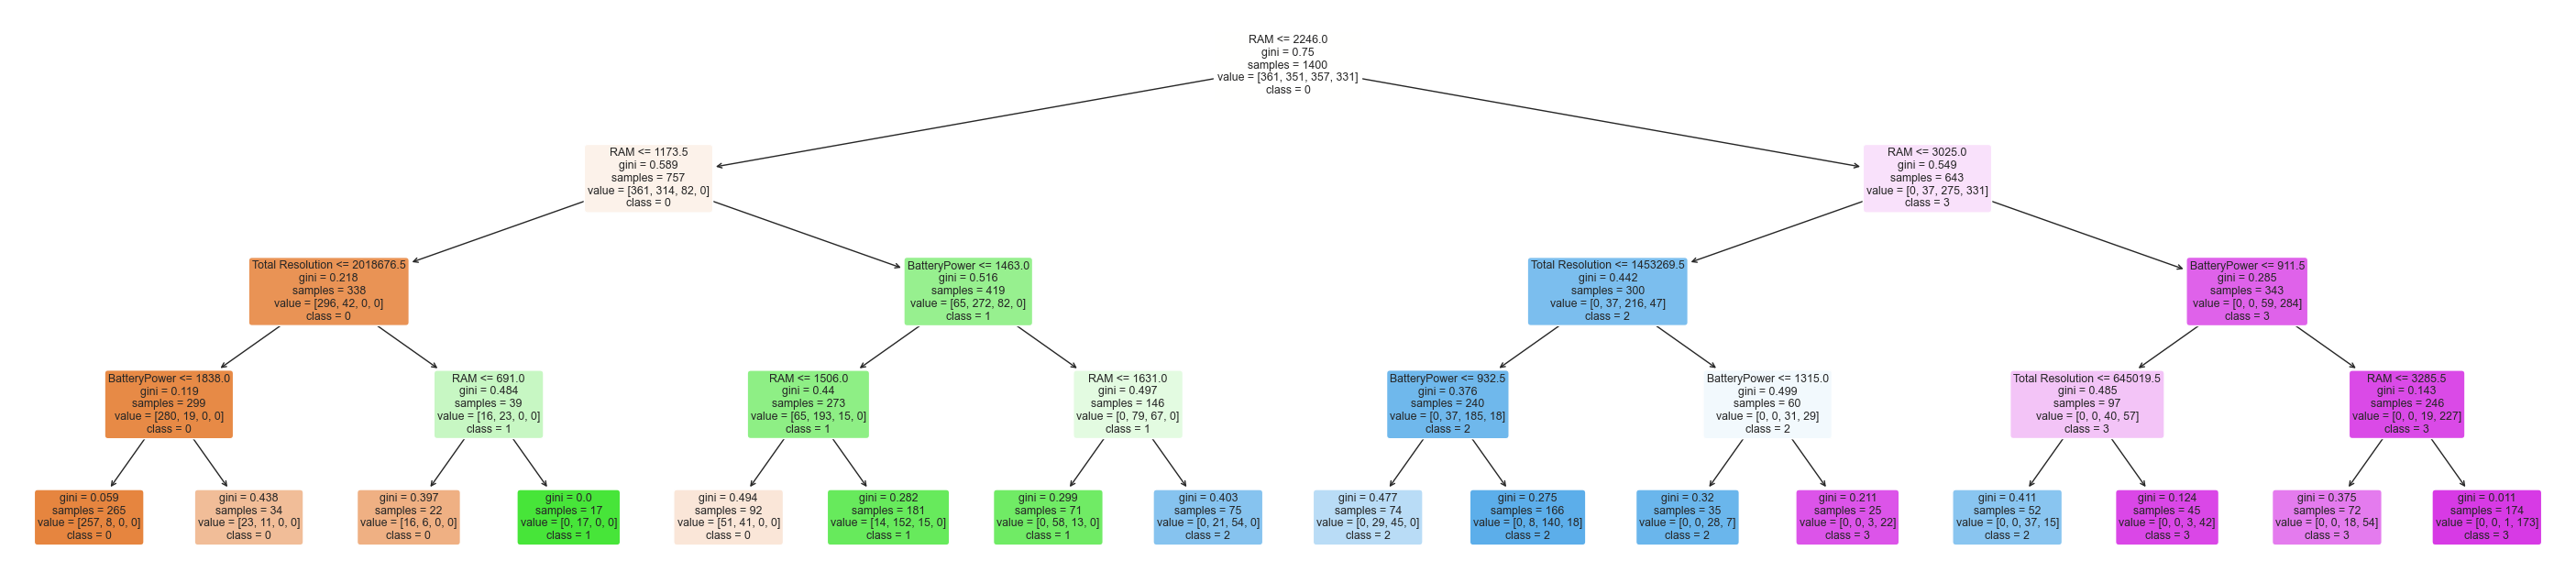

In [7]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree


# Extract Response and Predictors
y = pd.DataFrame(newphonedata['PriceRange'])
X = pd.DataFrame(newphonedata.drop('PriceRange', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) 

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(36,8))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns.tolist(), 
          class_names=["0","1","2","3"])

Train Data
Accuracy: 0.835

True Positive Rate (TPR) for class 0: 0.961218836565097
True Negative Rate (TNR) for class 0: 0.9961501443695862
False Positive Rate (FPR) for class 0: 0.0038498556304138597
False Negative Rate (FNR) for class 0: 0.038781163434903045
True Positive Rate (TPR) for class 1: 0.6467236467236467
True Negative Rate (TNR) for class 1: 0.990467111534795
False Positive Rate (FPR) for class 1: 0.009532888465204958
False Negative Rate (FNR) for class 1: 0.35327635327635326
True Positive Rate (TPR) for class 2: 0.8515406162464986
True Negative Rate (TNR) for class 2: 0.9846596356663471
False Positive Rate (FPR) for class 2: 0.015340364333652923
False Negative Rate (FNR) for class 2: 0.1484593837535014
True Positive Rate (TPR) for class 3: 0.879154078549849
True Negative Rate (TNR) for class 3: 0.8746492048643593
False Positive Rate (FPR) for class 3: 0.1253507951356408
False Negative Rate (FNR) for class 3: 0.12084592145015106
Average True Positive Rate (TPR) across all 

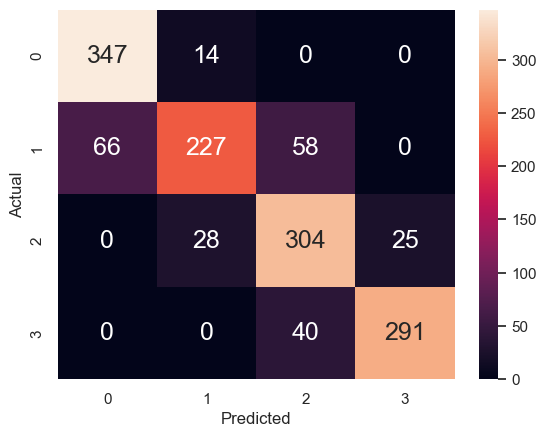

In [8]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy:", dectree.score(X_train, y_train))
print()

# Performance Evaluation on Train Data
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = [cmTrain[i][i] for i in range(4)]  # True Positives for each class
fnTrain = [sum(cmTrain[i]) - cmTrain[i][i] for i in range(4)]  # False Negatives for each class
fpTrain = [abs(sum(cmTrain[j]) - cmTrain[i][i]) for i in range(4) for j in range(4) if j != i]  # False Positives for each class
tnTrain = [sum(sum(cmTrain)) - tpTrain[i] - fnTrain[i] - fpTrain[i] for i in range(4)]  # True Negatives for each class

# Calculate True Positive Rate (TPR), True Negative Rate (TNR), False Positive Rate (FPR), and False Negative Rate (FNR) for each class on the training set
tprTrain = [tpTrain[i] / (tpTrain[i] + fnTrain[i]) for i in range(4)]  # True Positive Rate for each class
tnrTrain = [tnTrain[i] / (tnTrain[i] + fpTrain[i]) for i in range(4)]  # True Negative Rate for each class
fprTrain = [fpTrain[i] / (fpTrain[i] + tnTrain[i]) for i in range(4)]  # False Positive Rate for each class
fnrTrain = [fnTrain[i] / (fnTrain[i] + tpTrain[i]) for i in range(4)]  # False Negative Rate for each class

# Print TPR, TNR, FPR, and FNR for each class on the training set
for i in range(4):
    print(f"True Positive Rate (TPR) for class {i}: {tprTrain[i]}")
    print(f"True Negative Rate (TNR) for class {i}: {tnrTrain[i]}")
    print(f"False Positive Rate (FPR) for class {i}: {fprTrain[i]}")
    print(f"False Negative Rate (FNR) for class {i}: {fnrTrain[i]}")
    
# Calculate the average True Positive Rate (TPR) across all classes for the training data
avg_tpr_train = sum(tprTrain) / len(tprTrain)
print("Average True Positive Rate (TPR) across all classes (Training Data):", avg_tpr_train)

# Calculate the average True Negative Rate (TNR) across all classes for the training data
avg_tnr_train = sum(tnrTrain) / len(tnrTrain)
print("Average True Negative Rate (TNR) across all classes (Training Data):", avg_tnr_train)

# Calculate the average False Positive Rate (FPR) across all classes for the training data
avg_fpr_train = sum(fprTrain) / len(fprTrain)
print("Average False Positive Rate (FPR) across all classes (Training Data):", avg_fpr_train)

# Calculate the average False Negative Rate (FNR) across all classes for the training data
avg_fnr_train = sum(fnrTrain) / len(fnrTrain)
print("Average False Negative Rate (FNR) across all classes (Training Data):", avg_fnr_train)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot=True, fmt=".0f", annot_kws={"size": 18})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Test Data
Accuracy  :	 0.7966666666666666

True Positive Rate (TPR) for class 0: 0.9712230215827338
True Negative Rate (TNR) for class 0: 0.9696312364425163
False Positive Rate (FPR) for class 0: 0.03036876355748373
False Negative Rate (FNR) for class 0: 0.02877697841726619
True Positive Rate (TPR) for class 1: 0.5838926174496645
True Negative Rate (TNR) for class 1: 0.9822616407982262
False Positive Rate (FPR) for class 1: 0.017738359201773836
False Negative Rate (FNR) for class 1: 0.4161073825503356
True Positive Rate (TPR) for class 2: 0.7972027972027972
True Negative Rate (TNR) for class 2: 0.925601750547046
False Positive Rate (FPR) for class 2: 0.07439824945295405
False Negative Rate (FNR) for class 2: 0.20279720279720279
True Positive Rate (TPR) for class 3: 0.8402366863905325
True Negative Rate (TNR) for class 3: 0.8793503480278422
False Positive Rate (FPR) for class 3: 0.12064965197215777
False Negative Rate (FNR) for class 3: 0.15976331360946747
Average True Positive Rate (TP

<Axes: >

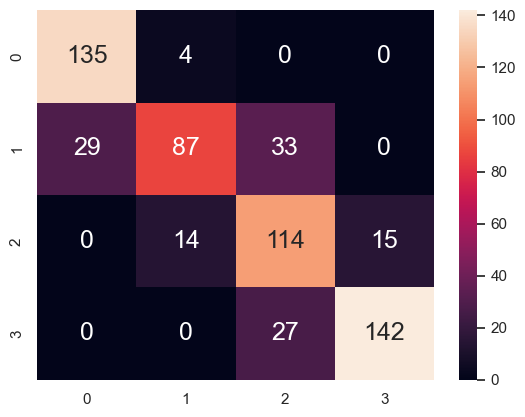

In [9]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()


# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = [cmTest[i][i] for i in range(4)]  # True Positives for each class
fnTest = [sum(cmTest[i]) - cmTest[i][i] for i in range(4)]  # False Negatives for each class
fpTest = [sum(cmTest[j]) - cmTest[i][i] for i in range(4) for j in range(4) if j != i]  # False Positives for each class
tnTest = [sum(sum(cmTest)) - tpTest[i] - fnTest[i] - fpTest[i] for i in range(4)]  # True Negatives for each class

    
# Calculate True Positive Rate (TPR), True Negative Rate (TNR), False Positive Rate (FPR), and False Negative Rate (FNR) for each class
tprTest = [tpTest[i] / (tpTest[i] + fnTest[i]) for i in range(4)]  # True Positive Rate for each class
tnrTest = [tnTest[i] / (tnTest[i] + fpTest[i]) for i in range(4)]  # True Negative Rate for each class
fprTest = [fpTest[i] / (fpTest[i] + tnTest[i]) for i in range(4)]  # False Positive Rate for each class
fnrTest = [fnTest[i] / (fnTest[i] + tpTest[i]) for i in range(4)]  # False Negative Rate for each class

# Print TPR, TNR, FPR, and FNR for each class
for i in range(4):
    print(f"True Positive Rate (TPR) for class {i}: {tprTest[i]}")
    print(f"True Negative Rate (TNR) for class {i}: {tnrTest[i]}")
    print(f"False Positive Rate (FPR) for class {i}: {fprTest[i]}")
    print(f"False Negative Rate (FNR) for class {i}: {fnrTest[i]}")
    
# Calculate the average True Positive Rate (TPR) across all classes
avg_tpr = sum(tprTest) / len(tprTest)
print("Average True Positive Rate (TPR) across all classes:", avg_tpr)

# Calculate the average True Negative Rate (TNR) across all classes
avg_tnr = sum(tnrTest) / len(tnrTest)
print("Average True Negative Rate (TNR) across all classes:", avg_tnr)

# Calculate the average False Positive Rate (FPR) across all classes
avg_fpr = sum(fprTest) / len(fprTest)
print("Average False Positive Rate (FPR) across all classes:", avg_fpr)

# Calculate the average False Negative Rate (FNR) across all classes
avg_fnr = sum(fnrTest) / len(fnrTest)
print("Average False Negative Rate (FNR) across all classes:", avg_fnr)
# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Model 2: Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Extract Response and Predictors
y = pd.DataFrame(newphonedata['PriceRange'])
X = pd.DataFrame(newphonedata.drop('PriceRange', axis=1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators=100, max_depth=4)
rforest.fit(X_train, y_train.PriceRange.ravel())



RandomForestClassifier(max_depth=4)

Train Data
Accuracy  :	 0.8928571428571429
True Positive Rate (TPR) for class 0: 0.9825581395348837
True Negative Rate (TNR) for class 0: 0.9801136363636364
False Positive Rate (FPR) for class 0: 0.019886363636363636
False Negative Rate (FNR) for class 0: 0.01744186046511628
True Positive Rate (TPR) for class 1: 0.8245125348189415
True Negative Rate (TNR) for class 1: 0.989433237271854
False Positive Rate (FPR) for class 1: 0.010566762728146013
False Negative Rate (FNR) for class 1: 0.17548746518105848
True Positive Rate (TPR) for class 2: 0.7793696275071633
True Negative Rate (TNR) for class 2: 0.9904852521408183
False Positive Rate (FPR) for class 2: 0.009514747859181731
False Negative Rate (FNR) for class 2: 0.22063037249283668
True Positive Rate (TPR) for class 3: 0.9885057471264368
True Negative Rate (TNR) for class 3: 0.9543726235741445
False Positive Rate (FPR) for class 3: 0.045627376425855515
False Negative Rate (FNR) for class 3: 0.011494252873563218
Average True Positive Rat

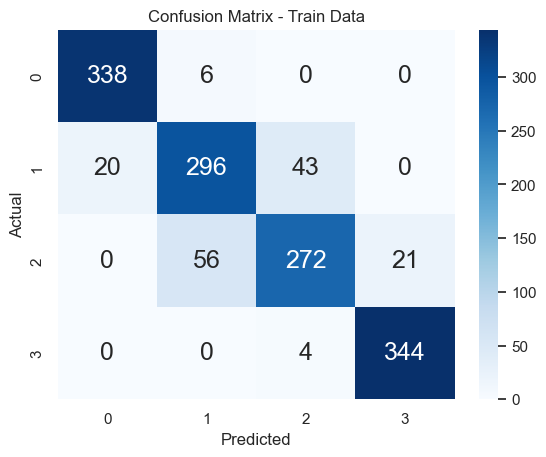

In [11]:
# Predictions on Train Data
y_train_pred = rforest.predict(X_train)

# Performance Evaluation on Train Data
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = [cmTrain[i][i] for i in range(4)]  # True Positives for each class
fnTrain = [sum(cmTrain[i]) - cmTrain[i][i] for i in range(4)]  # False Negatives for each class
fpTrain = [abs(sum(cmTrain[j]) - cmTrain[i][i]) for i in range(4) for j in range(4) if j != i]  # False Positives for each class
tnTrain = [sum(sum(cmTrain)) - tpTrain[i] - fnTrain[i] - fpTrain[i] for i in range(4)]  # True Negatives for each class

# Calculate True Positive Rate (TPR), True Negative Rate (TNR), False Positive Rate (FPR), and False Negative Rate (FNR) for each class on the training set
tprTrain = [tpTrain[i] / (tpTrain[i] + fnTrain[i]) for i in range(4)]  # True Positive Rate for each class
tnrTrain = [tnTrain[i] / (tnTrain[i] + fpTrain[i]) for i in range(4)]  # True Negative Rate for each class
fprTrain = [fpTrain[i] / (fpTrain[i] + tnTrain[i]) for i in range(4)]  # False Positive Rate for each class
fnrTrain = [fnTrain[i] / (fnTrain[i] + tpTrain[i]) for i in range(4)]  # False Negative Rate for each class

# Print TPR, TNR, FPR, and FNR for each class on the training set
for i in range(4):
    print(f"True Positive Rate (TPR) for class {i}: {tprTrain[i]}")
    print(f"True Negative Rate (TNR) for class {i}: {tnrTrain[i]}")
    print(f"False Positive Rate (FPR) for class {i}: {fprTrain[i]}")
    print(f"False Negative Rate (FNR) for class {i}: {fnrTrain[i]}")
    
# Calculate the average True Positive Rate (TPR) across all classes for the training data
avg_tpr_train = sum(tprTrain) / len(tprTrain)
print("Average True Positive Rate (TPR) across all classes (Training Data):", avg_tpr_train)

# Calculate the average True Negative Rate (TNR) across all classes for the training data
avg_tnr_train = sum(tnrTrain) / len(tnrTrain)
print("Average True Negative Rate (TNR) across all classes (Training Data):", avg_tnr_train)

# Calculate the average False Positive Rate (FPR) across all classes for the training data
avg_fpr_train = sum(fprTrain) / len(fprTrain)
print("Average False Positive Rate (FPR) across all classes (Training Data):", avg_fpr_train)

# Calculate the average False Negative Rate (FNR) across all classes for the training data
avg_fnr_train = sum(fnrTrain) / len(fnrTrain)
print("Average False Negative Rate (FNR) across all classes (Training Data):", avg_fnr_train)

# Plot the two-way Confusion Matrix for Train and Test Data
sb.heatmap(cmTrain, annot=True, fmt=".0f", annot_kws={"size": 18}, cmap="Blues")
plt.title("Confusion Matrix - Train Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



Test Data
Accuracy  :	 0.8266666666666667
True Positive Rate (TPR) for class 0: 0.967948717948718
True Negative Rate (TNR) for class 0: 1.0225225225225225
False Positive Rate (FPR) for class 0: -0.02252252252252252
False Negative Rate (FNR) for class 0: 0.03205128205128205
True Positive Rate (TPR) for class 1: 0.8085106382978723
True Negative Rate (TNR) for class 1: 1.0
False Positive Rate (FPR) for class 1: 0.0
False Negative Rate (FNR) for class 1: 0.19148936170212766
True Positive Rate (TPR) for class 2: 0.609271523178808
True Negative Rate (TNR) for class 2: 0.9977728285077951
False Positive Rate (FPR) for class 2: 0.0022271714922048997
False Negative Rate (FNR) for class 2: 0.39072847682119205
True Positive Rate (TPR) for class 3: 0.9144736842105263
True Negative Rate (TNR) for class 3: 0.90625
False Positive Rate (FPR) for class 3: 0.09375
False Negative Rate (FNR) for class 3: 0.08552631578947369
Average True Positive Rate (TPR) across all classes: 0.8250511409089811
Average Tr

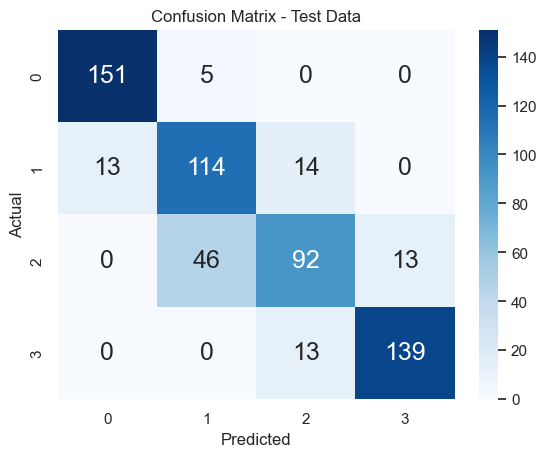

In [12]:
# Predictions on Test Data
y_test_pred = rforest.predict(X_test)

# Performance Evaluation on Test Data
print("\nTest Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = [cmTest[i][i] for i in range(4)]  # True Positives for each class
fnTest = [sum(cmTest[i]) - cmTest[i][i] for i in range(4)]  # False Negatives for each class
fpTest = [sum(cmTest[j]) - cmTest[i][i] for i in range(4) for j in range(4) if j != i]  # False Positives for each class
tnTest = [sum(sum(cmTest)) - tpTest[i] - fnTest[i] - fpTest[i] for i in range(4)]  # True Negatives for each class

    
# Calculate True Positive Rate (TPR), True Negative Rate (TNR), False Positive Rate (FPR), and False Negative Rate (FNR) for each class
tprTest = [tpTest[i] / (tpTest[i] + fnTest[i]) for i in range(4)]  # True Positive Rate for each class
tnrTest = [tnTest[i] / (tnTest[i] + fpTest[i]) for i in range(4)]  # True Negative Rate for each class
fprTest = [fpTest[i] / (fpTest[i] + tnTest[i]) for i in range(4)]  # False Positive Rate for each class
fnrTest = [fnTest[i] / (fnTest[i] + tpTest[i]) for i in range(4)]  # False Negative Rate for each class

# Print TPR, TNR, FPR, and FNR for each class
for i in range(4):
    print(f"True Positive Rate (TPR) for class {i}: {tprTest[i]}")
    print(f"True Negative Rate (TNR) for class {i}: {tnrTest[i]}")
    print(f"False Positive Rate (FPR) for class {i}: {fprTest[i]}")
    print(f"False Negative Rate (FNR) for class {i}: {fnrTest[i]}")
    
# Calculate the average True Positive Rate (TPR) across all classes
avg_tpr = sum(tprTest) / len(tprTest)
print("Average True Positive Rate (TPR) across all classes:", avg_tpr)

# Calculate the average True Negative Rate (TNR) across all classes
avg_tnr = sum(tnrTest) / len(tnrTest)
print("Average True Negative Rate (TNR) across all classes:", avg_tnr)

# Calculate the average False Positive Rate (FPR) across all classes
avg_fpr = sum(fprTest) / len(fprTest)
print("Average False Positive Rate (FPR) across all classes:", avg_fpr)

# Calculate the average False Negative Rate (FNR) across all classes
avg_fnr = sum(fnrTest) / len(fnrTest)
print("Average False Negative Rate (FNR) across all classes:", avg_fnr)

sb.heatmap(cmTest, annot=True, fmt=".0f", annot_kws={"size": 18}, cmap="Blues")
plt.title("Confusion Matrix - Test Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Model 2.1: Random Forest with number of trees increased

In [16]:
# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators=300, max_depth=4)
rforest.fit(X_train, y_train.PriceRange.ravel())


RandomForestClassifier(max_depth=4, n_estimators=300)

Train Data
Accuracy  :	 0.8885714285714286
True Positive Rate (TPR) for class 0: 0.9738372093023255
True Negative Rate (TNR) for class 0: 0.9772727272727273
False Positive Rate (FPR) for class 0: 0.022727272727272728
False Negative Rate (FNR) for class 0: 0.02616279069767442
True Positive Rate (TPR) for class 1: 0.8161559888579387
True Negative Rate (TNR) for class 1: 0.9865513928914506
False Positive Rate (FPR) for class 1: 0.013448607108549471
False Negative Rate (FNR) for class 1: 0.18384401114206128
True Positive Rate (TPR) for class 2: 0.7822349570200573
True Negative Rate (TNR) for class 2: 0.9876308277830638
False Positive Rate (FPR) for class 2: 0.012369172216936251
False Negative Rate (FNR) for class 2: 0.2177650429799427
True Positive Rate (TPR) for class 3: 0.985632183908046
True Negative Rate (TNR) for class 3: 0.9515209125475285
False Positive Rate (FPR) for class 3: 0.04847908745247148
False Negative Rate (FNR) for class 3: 0.014367816091954023
Average True Positive Rate 

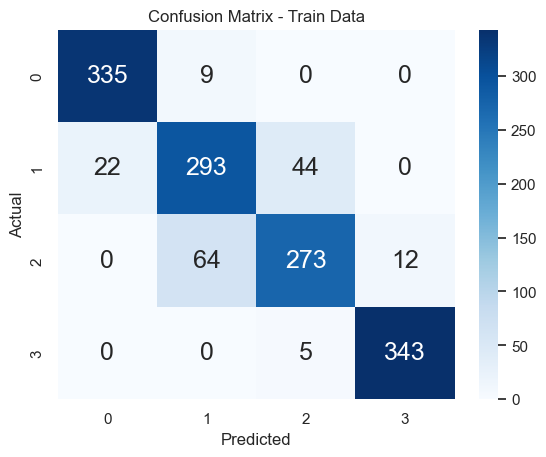

In [17]:
# Predictions on Train Data
y_train_pred = rforest.predict(X_train)

# Performance Evaluation on Train Data
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = [cmTrain[i][i] for i in range(4)]  # True Positives for each class
fnTrain = [sum(cmTrain[i]) - cmTrain[i][i] for i in range(4)]  # False Negatives for each class
fpTrain = [abs(sum(cmTrain[j]) - cmTrain[i][i]) for i in range(4) for j in range(4) if j != i]  # False Positives for each class
tnTrain = [sum(sum(cmTrain)) - tpTrain[i] - fnTrain[i] - fpTrain[i] for i in range(4)]  # True Negatives for each class

# Calculate True Positive Rate (TPR), True Negative Rate (TNR), False Positive Rate (FPR), and False Negative Rate (FNR) for each class on the training set
tprTrain = [tpTrain[i] / (tpTrain[i] + fnTrain[i]) for i in range(4)]  # True Positive Rate for each class
tnrTrain = [tnTrain[i] / (tnTrain[i] + fpTrain[i]) for i in range(4)]  # True Negative Rate for each class
fprTrain = [fpTrain[i] / (fpTrain[i] + tnTrain[i]) for i in range(4)]  # False Positive Rate for each class
fnrTrain = [fnTrain[i] / (fnTrain[i] + tpTrain[i]) for i in range(4)]  # False Negative Rate for each class

# Print TPR, TNR, FPR, and FNR for each class on the training set
for i in range(4):
    print(f"True Positive Rate (TPR) for class {i}: {tprTrain[i]}")
    print(f"True Negative Rate (TNR) for class {i}: {tnrTrain[i]}")
    print(f"False Positive Rate (FPR) for class {i}: {fprTrain[i]}")
    print(f"False Negative Rate (FNR) for class {i}: {fnrTrain[i]}")
    
# Calculate the average True Positive Rate (TPR) across all classes for the training data
avg_tpr_train = sum(tprTrain) / len(tprTrain)
print("Average True Positive Rate (TPR) across all classes (Training Data):", avg_tpr_train)

# Calculate the average True Negative Rate (TNR) across all classes for the training data
avg_tnr_train = sum(tnrTrain) / len(tnrTrain)
print("Average True Negative Rate (TNR) across all classes (Training Data):", avg_tnr_train)

# Calculate the average False Positive Rate (FPR) across all classes for the training data
avg_fpr_train = sum(fprTrain) / len(fprTrain)
print("Average False Positive Rate (FPR) across all classes (Training Data):", avg_fpr_train)

# Calculate the average False Negative Rate (FNR) across all classes for the training data
avg_fnr_train = sum(fnrTrain) / len(fnrTrain)
print("Average False Negative Rate (FNR) across all classes (Training Data):", avg_fnr_train)

# Plot the two-way Confusion Matrix for Train and Test Data
sb.heatmap(cmTrain, annot=True, fmt=".0f", annot_kws={"size": 18}, cmap="Blues")
plt.title("Confusion Matrix - Train Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Test Data
Accuracy  :	 0.8383333333333334
True Positive Rate (TPR) for class 0: 0.9743589743589743
True Negative Rate (TNR) for class 0: 1.0247747747747749
False Positive Rate (FPR) for class 0: -0.024774774774774775
False Negative Rate (FNR) for class 0: 0.02564102564102564
True Positive Rate (TPR) for class 1: 0.8156028368794326
True Negative Rate (TNR) for class 1: 1.0021786492374727
False Positive Rate (FPR) for class 1: -0.002178649237472767
False Negative Rate (FNR) for class 1: 0.18439716312056736
True Positive Rate (TPR) for class 2: 0.609271523178808
True Negative Rate (TNR) for class 2: 1.0
False Positive Rate (FPR) for class 2: 0.0
False Negative Rate (FNR) for class 2: 0.39072847682119205
True Positive Rate (TPR) for class 3: 0.9473684210526315
True Negative Rate (TNR) for class 3: 0.9084821428571429
False Positive Rate (FPR) for class 3: 0.09151785714285714
False Negative Rate (FNR) for class 3: 0.05263157894736842
Average True Positive Rate (TPR) across all classes: 0.83

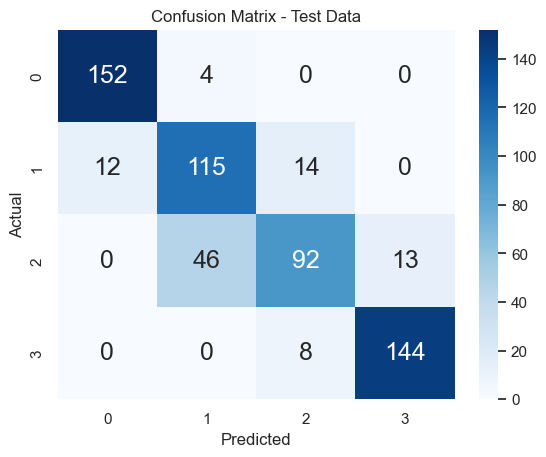

In [18]:
# Predictions on Test Data
y_test_pred = rforest.predict(X_test)

# Performance Evaluation on Test Data
print("\nTest Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = [cmTest[i][i] for i in range(4)]  # True Positives for each class
fnTest = [sum(cmTest[i]) - cmTest[i][i] for i in range(4)]  # False Negatives for each class
fpTest = [sum(cmTest[j]) - cmTest[i][i] for i in range(4) for j in range(4) if j != i]  # False Positives for each class
tnTest = [sum(sum(cmTest)) - tpTest[i] - fnTest[i] - fpTest[i] for i in range(4)]  # True Negatives for each class

    
# Calculate True Positive Rate (TPR), True Negative Rate (TNR), False Positive Rate (FPR), and False Negative Rate (FNR) for each class
tprTest = [tpTest[i] / (tpTest[i] + fnTest[i]) for i in range(4)]  # True Positive Rate for each class
tnrTest = [tnTest[i] / (tnTest[i] + fpTest[i]) for i in range(4)]  # True Negative Rate for each class
fprTest = [fpTest[i] / (fpTest[i] + tnTest[i]) for i in range(4)]  # False Positive Rate for each class
fnrTest = [fnTest[i] / (fnTest[i] + tpTest[i]) for i in range(4)]  # False Negative Rate for each class

# Print TPR, TNR, FPR, and FNR for each class
for i in range(4):
    print(f"True Positive Rate (TPR) for class {i}: {tprTest[i]}")
    print(f"True Negative Rate (TNR) for class {i}: {tnrTest[i]}")
    print(f"False Positive Rate (FPR) for class {i}: {fprTest[i]}")
    print(f"False Negative Rate (FNR) for class {i}: {fnrTest[i]}")
    
# Calculate the average True Positive Rate (TPR) across all classes
avg_tpr = sum(tprTest) / len(tprTest)
print("Average True Positive Rate (TPR) across all classes:", avg_tpr)

# Calculate the average True Negative Rate (TNR) across all classes
avg_tnr = sum(tnrTest) / len(tnrTest)
print("Average True Negative Rate (TNR) across all classes:", avg_tnr)

# Calculate the average False Positive Rate (FPR) across all classes
avg_fpr = sum(fprTest) / len(fprTest)
print("Average False Positive Rate (FPR) across all classes:", avg_fpr)

# Calculate the average False Negative Rate (FNR) across all classes
avg_fnr = sum(fnrTest) / len(fnrTest)
print("Average False Negative Rate (FNR) across all classes:", avg_fnr)

sb.heatmap(cmTest, annot=True, fmt=".0f", annot_kws={"size": 18}, cmap="Blues")
plt.title("Confusion Matrix - Test Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


The accuracy in both Train and Test data almost unchange.

# Model 2.2: Random Forest with depth increased

In [19]:
# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators=100, max_depth=7)
rforest.fit(X_train, y_train.PriceRange.ravel())


RandomForestClassifier(max_depth=7)

Train Data
Accuracy  :	 0.9692857142857143
True Positive Rate (TPR) for class 0: 0.9854651162790697
True Negative Rate (TNR) for class 0: 0.9810606060606061
False Positive Rate (FPR) for class 0: 0.01893939393939394
False Negative Rate (FNR) for class 0: 0.014534883720930232
True Positive Rate (TPR) for class 1: 0.9498607242339833
True Negative Rate (TNR) for class 1: 0.9903938520653218
False Positive Rate (FPR) for class 1: 0.009606147934678195
False Negative Rate (FNR) for class 1: 0.05013927576601671
True Positive Rate (TPR) for class 2: 0.9541547277936963
True Negative Rate (TNR) for class 2: 0.9914367269267365
False Positive Rate (FPR) for class 2: 0.008563273073263558
False Negative Rate (FNR) for class 2: 0.045845272206303724
True Positive Rate (TPR) for class 3: 0.9885057471264368
True Negative Rate (TNR) for class 3: 0.997148288973384
False Positive Rate (FPR) for class 3: 0.0028517110266159697
False Negative Rate (FNR) for class 3: 0.011494252873563218
Average True Positive R

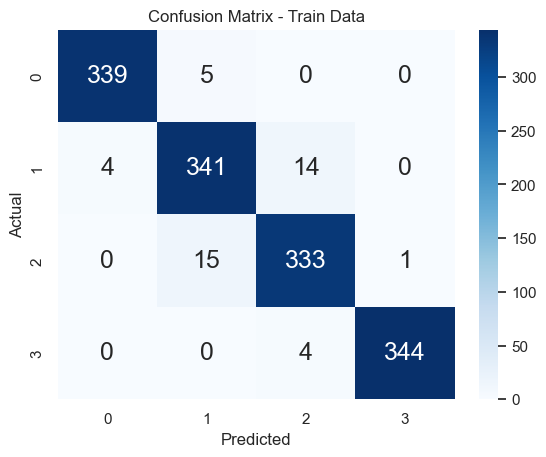

In [20]:
# Predictions on Train Data
y_train_pred = rforest.predict(X_train)

# Performance Evaluation on Train Data
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = [cmTrain[i][i] for i in range(4)]  # True Positives for each class
fnTrain = [sum(cmTrain[i]) - cmTrain[i][i] for i in range(4)]  # False Negatives for each class
fpTrain = [abs(sum(cmTrain[j]) - cmTrain[i][i]) for i in range(4) for j in range(4) if j != i]  # False Positives for each class
tnTrain = [sum(sum(cmTrain)) - tpTrain[i] - fnTrain[i] - fpTrain[i] for i in range(4)]  # True Negatives for each class

# Calculate True Positive Rate (TPR), True Negative Rate (TNR), False Positive Rate (FPR), and False Negative Rate (FNR) for each class on the training set
tprTrain = [tpTrain[i] / (tpTrain[i] + fnTrain[i]) for i in range(4)]  # True Positive Rate for each class
tnrTrain = [tnTrain[i] / (tnTrain[i] + fpTrain[i]) for i in range(4)]  # True Negative Rate for each class
fprTrain = [fpTrain[i] / (fpTrain[i] + tnTrain[i]) for i in range(4)]  # False Positive Rate for each class
fnrTrain = [fnTrain[i] / (fnTrain[i] + tpTrain[i]) for i in range(4)]  # False Negative Rate for each class

# Print TPR, TNR, FPR, and FNR for each class on the training set
for i in range(4):
    print(f"True Positive Rate (TPR) for class {i}: {tprTrain[i]}")
    print(f"True Negative Rate (TNR) for class {i}: {tnrTrain[i]}")
    print(f"False Positive Rate (FPR) for class {i}: {fprTrain[i]}")
    print(f"False Negative Rate (FNR) for class {i}: {fnrTrain[i]}")
    
# Calculate the average True Positive Rate (TPR) across all classes for the training data
avg_tpr_train = sum(tprTrain) / len(tprTrain)
print("Average True Positive Rate (TPR) across all classes (Training Data):", avg_tpr_train)

# Calculate the average True Negative Rate (TNR) across all classes for the training data
avg_tnr_train = sum(tnrTrain) / len(tnrTrain)
print("Average True Negative Rate (TNR) across all classes (Training Data):", avg_tnr_train)

# Calculate the average False Positive Rate (FPR) across all classes for the training data
avg_fpr_train = sum(fprTrain) / len(fprTrain)
print("Average False Positive Rate (FPR) across all classes (Training Data):", avg_fpr_train)

# Calculate the average False Negative Rate (FNR) across all classes for the training data
avg_fnr_train = sum(fnrTrain) / len(fnrTrain)
print("Average False Negative Rate (FNR) across all classes (Training Data):", avg_fnr_train)

# Plot the two-way Confusion Matrix for Train and Test Data
sb.heatmap(cmTrain, annot=True, fmt=".0f", annot_kws={"size": 18}, cmap="Blues")
plt.title("Confusion Matrix - Train Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Test Data
Accuracy  :	 0.855
True Positive Rate (TPR) for class 0: 0.967948717948718
True Negative Rate (TNR) for class 0: 1.0225225225225225
False Positive Rate (FPR) for class 0: -0.02252252252252252
False Negative Rate (FNR) for class 0: 0.03205128205128205
True Positive Rate (TPR) for class 1: 0.851063829787234
True Negative Rate (TNR) for class 1: 1.0
False Positive Rate (FPR) for class 1: 0.0
False Negative Rate (FNR) for class 1: 0.14893617021276595
True Positive Rate (TPR) for class 2: 0.7218543046357616
True Negative Rate (TNR) for class 2: 0.9977728285077951
False Positive Rate (FPR) for class 2: 0.0022271714922048997
False Negative Rate (FNR) for class 2: 0.2781456953642384
True Positive Rate (TPR) for class 3: 0.875
True Negative Rate (TNR) for class 3: 0.9196428571428571
False Positive Rate (FPR) for class 3: 0.08035714285714286
False Negative Rate (FNR) for class 3: 0.125
Average True Positive Rate (TPR) across all classes: 0.8539667130929284
Average True Negative Rate (

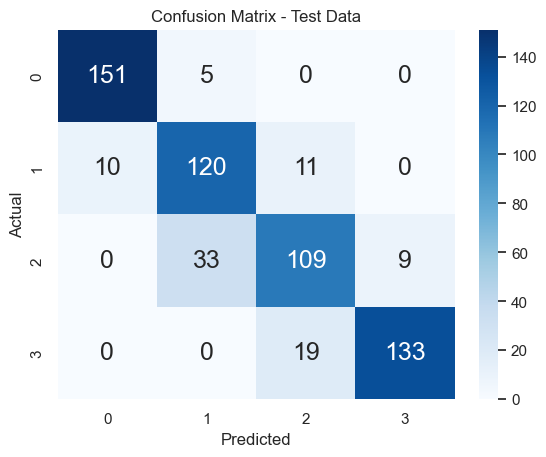

In [21]:
# Predictions on Test Data
y_test_pred = rforest.predict(X_test)

# Performance Evaluation on Test Data
print("\nTest Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = [cmTest[i][i] for i in range(4)]  # True Positives for each class
fnTest = [sum(cmTest[i]) - cmTest[i][i] for i in range(4)]  # False Negatives for each class
fpTest = [sum(cmTest[j]) - cmTest[i][i] for i in range(4) for j in range(4) if j != i]  # False Positives for each class
tnTest = [sum(sum(cmTest)) - tpTest[i] - fnTest[i] - fpTest[i] for i in range(4)]  # True Negatives for each class

    
# Calculate True Positive Rate (TPR), True Negative Rate (TNR), False Positive Rate (FPR), and False Negative Rate (FNR) for each class
tprTest = [tpTest[i] / (tpTest[i] + fnTest[i]) for i in range(4)]  # True Positive Rate for each class
tnrTest = [tnTest[i] / (tnTest[i] + fpTest[i]) for i in range(4)]  # True Negative Rate for each class
fprTest = [fpTest[i] / (fpTest[i] + tnTest[i]) for i in range(4)]  # False Positive Rate for each class
fnrTest = [fnTest[i] / (fnTest[i] + tpTest[i]) for i in range(4)]  # False Negative Rate for each class

# Print TPR, TNR, FPR, and FNR for each class
for i in range(4):
    print(f"True Positive Rate (TPR) for class {i}: {tprTest[i]}")
    print(f"True Negative Rate (TNR) for class {i}: {tnrTest[i]}")
    print(f"False Positive Rate (FPR) for class {i}: {fprTest[i]}")
    print(f"False Negative Rate (FNR) for class {i}: {fnrTest[i]}")
    
# Calculate the average True Positive Rate (TPR) across all classes
avg_tpr = sum(tprTest) / len(tprTest)
print("Average True Positive Rate (TPR) across all classes:", avg_tpr)

# Calculate the average True Negative Rate (TNR) across all classes
avg_tnr = sum(tnrTest) / len(tnrTest)
print("Average True Negative Rate (TNR) across all classes:", avg_tnr)

# Calculate the average False Positive Rate (FPR) across all classes
avg_fpr = sum(fprTest) / len(fprTest)
print("Average False Positive Rate (FPR) across all classes:", avg_fpr)

# Calculate the average False Negative Rate (FNR) across all classes
avg_fnr = sum(fnrTest) / len(fnrTest)
print("Average False Negative Rate (FNR) across all classes:", avg_fnr)

sb.heatmap(cmTest, annot=True, fmt=".0f", annot_kws={"size": 18}, cmap="Blues")
plt.title("Confusion Matrix - Test Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


The accuracy for both Train and Test data have increases.

# Model 2.3: Random Forest with both depth and number of trees increased.

In [22]:
# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators=300, max_depth=7)
rforest.fit(X_train, y_train.PriceRange.ravel())


RandomForestClassifier(max_depth=7, n_estimators=300)

Train Data
Accuracy  :	 0.9721428571428572
True Positive Rate (TPR) for class 0: 0.9854651162790697
True Negative Rate (TNR) for class 0: 0.9810606060606061
False Positive Rate (FPR) for class 0: 0.01893939393939394
False Negative Rate (FNR) for class 0: 0.014534883720930232
True Positive Rate (TPR) for class 1: 0.9526462395543176
True Negative Rate (TNR) for class 1: 0.9903938520653218
False Positive Rate (FPR) for class 1: 0.009606147934678195
False Negative Rate (FNR) for class 1: 0.04735376044568245
True Positive Rate (TPR) for class 2: 0.9541547277936963
True Negative Rate (TNR) for class 2: 0.9914367269267365
False Positive Rate (FPR) for class 2: 0.008563273073263558
False Negative Rate (FNR) for class 2: 0.045845272206303724
True Positive Rate (TPR) for class 3: 0.9971264367816092
True Negative Rate (TNR) for class 3: 0.9980988593155894
False Positive Rate (FPR) for class 3: 0.0019011406844106464
False Negative Rate (FNR) for class 3: 0.0028735632183908046
Average True Positive

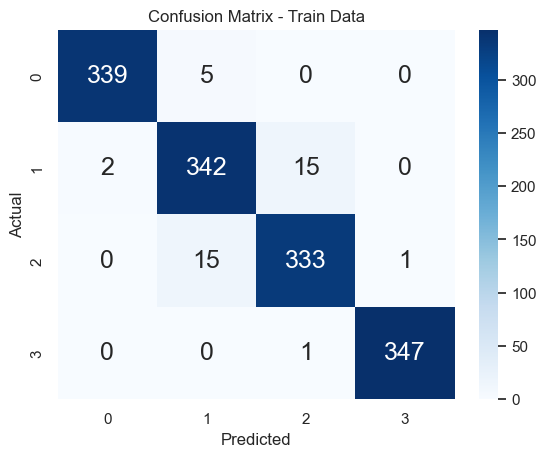

In [23]:
# Predictions on Train Data
y_train_pred = rforest.predict(X_train)

# Performance Evaluation on Train Data
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = [cmTrain[i][i] for i in range(4)]  # True Positives for each class
fnTrain = [sum(cmTrain[i]) - cmTrain[i][i] for i in range(4)]  # False Negatives for each class
fpTrain = [abs(sum(cmTrain[j]) - cmTrain[i][i]) for i in range(4) for j in range(4) if j != i]  # False Positives for each class
tnTrain = [sum(sum(cmTrain)) - tpTrain[i] - fnTrain[i] - fpTrain[i] for i in range(4)]  # True Negatives for each class

# Calculate True Positive Rate (TPR), True Negative Rate (TNR), False Positive Rate (FPR), and False Negative Rate (FNR) for each class on the training set
tprTrain = [tpTrain[i] / (tpTrain[i] + fnTrain[i]) for i in range(4)]  # True Positive Rate for each class
tnrTrain = [tnTrain[i] / (tnTrain[i] + fpTrain[i]) for i in range(4)]  # True Negative Rate for each class
fprTrain = [fpTrain[i] / (fpTrain[i] + tnTrain[i]) for i in range(4)]  # False Positive Rate for each class
fnrTrain = [fnTrain[i] / (fnTrain[i] + tpTrain[i]) for i in range(4)]  # False Negative Rate for each class

# Print TPR, TNR, FPR, and FNR for each class on the training set
for i in range(4):
    print(f"True Positive Rate (TPR) for class {i}: {tprTrain[i]}")
    print(f"True Negative Rate (TNR) for class {i}: {tnrTrain[i]}")
    print(f"False Positive Rate (FPR) for class {i}: {fprTrain[i]}")
    print(f"False Negative Rate (FNR) for class {i}: {fnrTrain[i]}")
    
# Calculate the average True Positive Rate (TPR) across all classes for the training data
avg_tpr_train = sum(tprTrain) / len(tprTrain)
print("Average True Positive Rate (TPR) across all classes (Training Data):", avg_tpr_train)

# Calculate the average True Negative Rate (TNR) across all classes for the training data
avg_tnr_train = sum(tnrTrain) / len(tnrTrain)
print("Average True Negative Rate (TNR) across all classes (Training Data):", avg_tnr_train)

# Calculate the average False Positive Rate (FPR) across all classes for the training data
avg_fpr_train = sum(fprTrain) / len(fprTrain)
print("Average False Positive Rate (FPR) across all classes (Training Data):", avg_fpr_train)

# Calculate the average False Negative Rate (FNR) across all classes for the training data
avg_fnr_train = sum(fnrTrain) / len(fnrTrain)
print("Average False Negative Rate (FNR) across all classes (Training Data):", avg_fnr_train)

# Plot the two-way Confusion Matrix for Train and Test Data
sb.heatmap(cmTrain, annot=True, fmt=".0f", annot_kws={"size": 18}, cmap="Blues")
plt.title("Confusion Matrix - Train Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Test Data
Accuracy  :	 0.86
True Positive Rate (TPR) for class 0: 0.9615384615384616
True Negative Rate (TNR) for class 0: 1.0202702702702702
False Positive Rate (FPR) for class 0: -0.02027027027027027
False Negative Rate (FNR) for class 0: 0.038461538461538464
True Positive Rate (TPR) for class 1: 0.8652482269503546
True Negative Rate (TNR) for class 1: 0.9978213507625272
False Positive Rate (FPR) for class 1: 0.002178649237472767
False Negative Rate (FNR) for class 1: 0.1347517730496454
True Positive Rate (TPR) for class 2: 0.695364238410596
True Negative Rate (TNR) for class 2: 0.9955456570155902
False Positive Rate (FPR) for class 2: 0.004454342984409799
False Negative Rate (FNR) for class 2: 0.304635761589404
True Positive Rate (TPR) for class 3: 0.9144736842105263
True Negative Rate (TNR) for class 3: 0.9241071428571429
False Positive Rate (FPR) for class 3: 0.07589285714285714
False Negative Rate (FNR) for class 3: 0.08552631578947369
Average True Positive Rate (TPR) across all

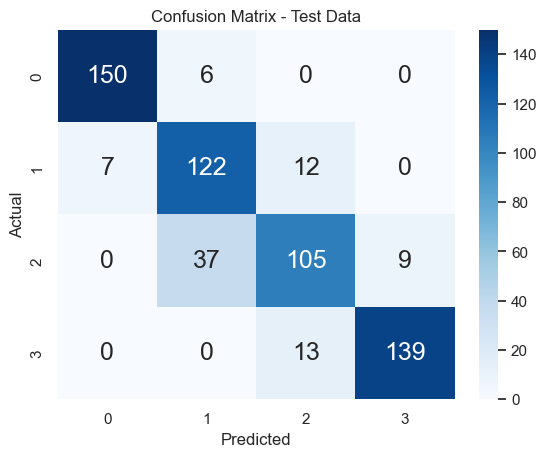

In [24]:
# Predictions on Test Data
y_test_pred = rforest.predict(X_test)

# Performance Evaluation on Test Data
print("\nTest Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = [cmTest[i][i] for i in range(4)]  # True Positives for each class
fnTest = [sum(cmTest[i]) - cmTest[i][i] for i in range(4)]  # False Negatives for each class
fpTest = [sum(cmTest[j]) - cmTest[i][i] for i in range(4) for j in range(4) if j != i]  # False Positives for each class
tnTest = [sum(sum(cmTest)) - tpTest[i] - fnTest[i] - fpTest[i] for i in range(4)]  # True Negatives for each class

    
# Calculate True Positive Rate (TPR), True Negative Rate (TNR), False Positive Rate (FPR), and False Negative Rate (FNR) for each class
tprTest = [tpTest[i] / (tpTest[i] + fnTest[i]) for i in range(4)]  # True Positive Rate for each class
tnrTest = [tnTest[i] / (tnTest[i] + fpTest[i]) for i in range(4)]  # True Negative Rate for each class
fprTest = [fpTest[i] / (fpTest[i] + tnTest[i]) for i in range(4)]  # False Positive Rate for each class
fnrTest = [fnTest[i] / (fnTest[i] + tpTest[i]) for i in range(4)]  # False Negative Rate for each class

# Print TPR, TNR, FPR, and FNR for each class
for i in range(4):
    print(f"True Positive Rate (TPR) for class {i}: {tprTest[i]}")
    print(f"True Negative Rate (TNR) for class {i}: {tnrTest[i]}")
    print(f"False Positive Rate (FPR) for class {i}: {fprTest[i]}")
    print(f"False Negative Rate (FNR) for class {i}: {fnrTest[i]}")
    
# Calculate the average True Positive Rate (TPR) across all classes
avg_tpr = sum(tprTest) / len(tprTest)
print("Average True Positive Rate (TPR) across all classes:", avg_tpr)

# Calculate the average True Negative Rate (TNR) across all classes
avg_tnr = sum(tnrTest) / len(tnrTest)
print("Average True Negative Rate (TNR) across all classes:", avg_tnr)

# Calculate the average False Positive Rate (FPR) across all classes
avg_fpr = sum(fprTest) / len(fprTest)
print("Average False Positive Rate (FPR) across all classes:", avg_fpr)

# Calculate the average False Negative Rate (FNR) across all classes
avg_fnr = sum(fnrTest) / len(fnrTest)
print("Average False Negative Rate (FNR) across all classes:", avg_fnr)

sb.heatmap(cmTest, annot=True, fmt=".0f", annot_kws={"size": 18}, cmap="Blues")
plt.title("Confusion Matrix - Test Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


When both number of trees and depth increased, the accuracy in both Train and Test data increases. However, the result is similar when compare to the model with only the depth increased.

# Model 3: Using hyperparameter found by Cross-Validation and Grid Search

In [143]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Extract Response and Predictors
y = pd.DataFrame(newphonedata['PriceRange'])
X = pd.DataFrame(newphonedata.drop('PriceRange', axis=1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [30]:
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define the parameter grid
param_grid = {
    'n_estimators': np.arange(100, 501, 50),
    'max_depth': np.arange(4, 8)             
}

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv=5,                       # 5-fold cross-validation
                      scoring='accuracy')         # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train.PriceRange.ravel())

# Retrieve the best parameters and the best score
best_params = hpGrid.best_params_
best_score = hpGrid.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'max_depth': 7, 'n_estimators': 300}
Best Score: 0.8521428571428572


### Best Parameters: {'max_depth': 7, 'n_estimators': 300}

In [144]:
# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators=300, max_depth=7)
rforest.fit(X_train, y_train.PriceRange.ravel())


RandomForestClassifier(max_depth=7, n_estimators=300)

Train Data
Accuracy  :	 0.9671428571428572
True Positive Rate (TPR) for class 0: 0.9771428571428571
True Negative Rate (TNR) for class 0: 0.9904761904761905
False Positive Rate (FPR) for class 0: 0.009523809523809525
False Negative Rate (FNR) for class 0: 0.022857142857142857
True Positive Rate (TPR) for class 1: 0.9573863636363636
True Negative Rate (TNR) for class 1: 0.9942748091603053
False Positive Rate (FPR) for class 1: 0.0057251908396946565
False Negative Rate (FNR) for class 1: 0.04261363636363636
True Positive Rate (TPR) for class 2: 0.9482758620689655
True Negative Rate (TNR) for class 2: 0.9923954372623575
False Positive Rate (FPR) for class 2: 0.0076045627376425855
False Negative Rate (FNR) for class 2: 0.05172413793103448
True Positive Rate (TPR) for class 3: 0.9857142857142858
True Negative Rate (TNR) for class 3: 0.9876190476190476
False Positive Rate (FPR) for class 3: 0.012380952380952381
False Negative Rate (FNR) for class 3: 0.014285714285714285
Average True Positive

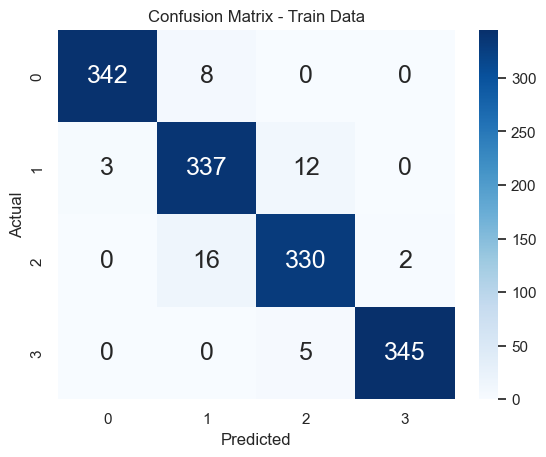

In [145]:
# Predictions on Train Data
y_train_pred = rforest.predict(X_train)

# Performance Evaluation on Train Data
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = [cmTrain[i][i] for i in range(4)]  # True Positives for each class
fnTrain = [sum(cmTrain[i]) - cmTrain[i][i] for i in range(4)]  # False Negatives for each class
fpTrain = [abs(sum(cmTrain[j]) - cmTrain[i][i]) for i in range(4) for j in range(4) if j != i]  # False Positives for each class
tnTrain = [sum(sum(cmTrain)) - tpTrain[i] - fnTrain[i] - fpTrain[i] for i in range(4)]  # True Negatives for each class

# Calculate True Positive Rate (TPR), True Negative Rate (TNR), False Positive Rate (FPR), and False Negative Rate (FNR) for each class on the training set
tprTrain = [tpTrain[i] / (tpTrain[i] + fnTrain[i]) for i in range(4)]  # True Positive Rate for each class
tnrTrain = [tnTrain[i] / (tnTrain[i] + fpTrain[i]) for i in range(4)]  # True Negative Rate for each class
fprTrain = [fpTrain[i] / (fpTrain[i] + tnTrain[i]) for i in range(4)]  # False Positive Rate for each class
fnrTrain = [fnTrain[i] / (fnTrain[i] + tpTrain[i]) for i in range(4)]  # False Negative Rate for each class

# Print TPR, TNR, FPR, and FNR for each class on the training set
for i in range(4):
    print(f"True Positive Rate (TPR) for class {i}: {tprTrain[i]}")
    print(f"True Negative Rate (TNR) for class {i}: {tnrTrain[i]}")
    print(f"False Positive Rate (FPR) for class {i}: {fprTrain[i]}")
    print(f"False Negative Rate (FNR) for class {i}: {fnrTrain[i]}")
    
# Calculate the average True Positive Rate (TPR) across all classes for the training data
avg_tpr_train = sum(tprTrain) / len(tprTrain)
print("Average True Positive Rate (TPR) across all classes (Training Data):", avg_tpr_train)

# Calculate the average True Negative Rate (TNR) across all classes for the training data
avg_tnr_train = sum(tnrTrain) / len(tnrTrain)
print("Average True Negative Rate (TNR) across all classes (Training Data):", avg_tnr_train)

# Calculate the average False Positive Rate (FPR) across all classes for the training data
avg_fpr_train = sum(fprTrain) / len(fprTrain)
print("Average False Positive Rate (FPR) across all classes (Training Data):", avg_fpr_train)

# Calculate the average False Negative Rate (FNR) across all classes for the training data
avg_fnr_train = sum(fnrTrain) / len(fnrTrain)
print("Average False Negative Rate (FNR) across all classes (Training Data):", avg_fnr_train)

# Plot the two-way Confusion Matrix for Train and Test Data
sb.heatmap(cmTrain, annot=True, fmt=".0f", annot_kws={"size": 18}, cmap="Blues")
plt.title("Confusion Matrix - Train Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Test Data
Accuracy  :	 0.8516666666666667
True Positive Rate (TPR) for class 0: 0.96
True Negative Rate (TNR) for class 0: 0.9911111111111112
False Positive Rate (FPR) for class 0: 0.008888888888888889
False Negative Rate (FNR) for class 0: 0.04
True Positive Rate (TPR) for class 1: 0.75
True Negative Rate (TNR) for class 1: 0.9823008849557522
False Positive Rate (FPR) for class 1: 0.017699115044247787
False Negative Rate (FNR) for class 1: 0.25
True Positive Rate (TPR) for class 2: 0.7171052631578947
True Negative Rate (TNR) for class 2: 0.9866071428571429
False Positive Rate (FPR) for class 2: 0.013392857142857142
False Negative Rate (FNR) for class 2: 0.28289473684210525
True Positive Rate (TPR) for class 3: 0.98
True Negative Rate (TNR) for class 3: 0.9133333333333333
False Positive Rate (FPR) for class 3: 0.08666666666666667
False Negative Rate (FNR) for class 3: 0.02
Average True Positive Rate (TPR) across all classes: 0.8517763157894737
Average True Negative Rate (TNR) across a

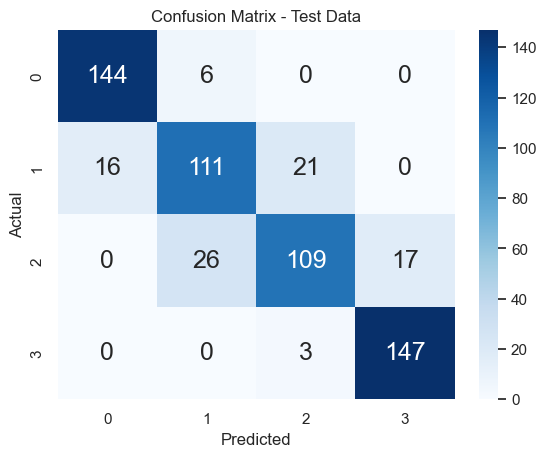

In [146]:
# Predictions on Test Data
y_test_pred = rforest.predict(X_test)

# Performance Evaluation on Test Data
print("\nTest Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = [cmTest[i][i] for i in range(4)]  # True Positives for each class
fnTest = [sum(cmTest[i]) - cmTest[i][i] for i in range(4)]  # False Negatives for each class
fpTest = [sum(cmTest[j]) - cmTest[i][i] for i in range(4) for j in range(4) if j != i]  # False Positives for each class
tnTest = [sum(sum(cmTest)) - tpTest[i] - fnTest[i] - fpTest[i] for i in range(4)]  # True Negatives for each class

    
# Calculate True Positive Rate (TPR), True Negative Rate (TNR), False Positive Rate (FPR), and False Negative Rate (FNR) for each class
tprTest = [tpTest[i] / (tpTest[i] + fnTest[i]) for i in range(4)]  # True Positive Rate for each class
tnrTest = [tnTest[i] / (tnTest[i] + fpTest[i]) for i in range(4)]  # True Negative Rate for each class
fprTest = [fpTest[i] / (fpTest[i] + tnTest[i]) for i in range(4)]  # False Positive Rate for each class
fnrTest = [fnTest[i] / (fnTest[i] + tpTest[i]) for i in range(4)]  # False Negative Rate for each class

# Print TPR, TNR, FPR, and FNR for each class
for i in range(4):
    print(f"True Positive Rate (TPR) for class {i}: {tprTest[i]}")
    print(f"True Negative Rate (TNR) for class {i}: {tnrTest[i]}")
    print(f"False Positive Rate (FPR) for class {i}: {fprTest[i]}")
    print(f"False Negative Rate (FNR) for class {i}: {fnrTest[i]}")
    
# Calculate the average True Positive Rate (TPR) across all classes
avg_tpr = sum(tprTest) / len(tprTest)
print("Average True Positive Rate (TPR) across all classes:", avg_tpr)

# Calculate the average True Negative Rate (TNR) across all classes
avg_tnr = sum(tnrTest) / len(tnrTest)
print("Average True Negative Rate (TNR) across all classes:", avg_tnr)

# Calculate the average False Positive Rate (FPR) across all classes
avg_fpr = sum(fprTest) / len(fprTest)
print("Average False Positive Rate (FPR) across all classes:", avg_fpr)

# Calculate the average False Negative Rate (FNR) across all classes
avg_fnr = sum(fnrTest) / len(fnrTest)
print("Average False Negative Rate (FNR) across all classes:", avg_fnr)

sb.heatmap(cmTest, annot=True, fmt=".0f", annot_kws={"size": 18}, cmap="Blues")
plt.title("Confusion Matrix - Test Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
